This notebook compares the BART errored data and that errored by tab-err

All data comes from clean HOSP

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load Data

In [ ]:
bart_1_df = pd.read_csv("../output/BART_hosp_1.csv", index_col=False)
bart_2_df = pd.read_csv("../output/BART_hosp_2.csv", index_col=False)

ecar_df = pd.read_csv("../output/ecar_typo_hosp_tab_err.csv", index_col=False)
ecar_mask_df = pd.read_csv("../output/ecar_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

enar_df = pd.read_csv("../output/enar_typo_hosp_tab_err.csv", index_col=False)
enar_mask_df = pd.read_csv("../output/enar_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

ear_df = pd.read_csv("../output/ear_typo_hosp_tab_err.csv", index_col=False)
ear_mask_df = pd.read_csv("../output/ear_typo_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

mid_level_df = pd.read_csv("../output/mid_level_HOSP.csv", index_col=False)
mid_level_mask = pd.read_csv("../output/mid_level_HOSP_mask.csv", index_col=False).astype(int).drop(columns=["Unnamed: 0"])

# Make BART colnames the same
bart_1_df.columns = mid_level_df.columns[1:]
bart_2_df.columns = mid_level_df.columns[1:]

In [65]:
# Count errors in BART dataset

# Function to count cells with exactly 3 asterisks - corresponds to BART error strategy
def count_three_asterisks(cell):
    cell_str = str(cell)  # Convert everything to string
    return 1 if cell_str.count('*') == 3 else 0

def create_error_mask_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates a binary DataFrame mask where 1 indicates a cell
    containing exactly three asterisks ('*'), and 0 otherwise.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A new DataFrame of the same shape with 0s and 1s.
    """
    # Use applymap to apply the lambda function to every single element
    # of the DataFrame. The lambda function returns 1 if the string
    # representation of the cell has exactly 3 asterisks, and 0 otherwise.
    error_mask_df = df.map(lambda x: 1 if str(x).count('*') == 3 else 0)
    return error_mask_df

def create_error_bar_chart(error_mask: pd.DataFrame):
    """
    Creates a bar chart visualizing the number of errors per column.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """

    # Sum the errors for each column
    column_error_counts = error_mask.sum()

    # Get the column names for the x-axis
    columns = column_error_counts.index

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(columns, column_error_counts, color='skyblue')
    plt.xlabel('Column Number')
    plt.ylabel('Number of Errors')
    plt.title('Number of Errors Per Column')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def create_grouped_error_bar_chart(
    error_masks: list[pd.DataFrame],
    labels: list[str],
    output_file: str = None  # e.g., "errors.pdf"
):
    """
    Creates a grouped bar chart visualizing the number of errors per column 
    for an arbitrary number of error masks.

    Args:
        error_masks (list[pd.DataFrame]): List of boolean error mask DataFrames.
        labels (list[str]): Labels for each error mask (must match length of error_masks).
        output_file (str): Optional. If provided, saves the chart to this file (supports PDF, PNG, etc.).
    """
    if len(error_masks) != len(labels):
        raise ValueError("Number of labels must match number of error masks.")

    # Collect all columns across DataFrames
    all_columns = error_masks[0].columns
    for df in error_masks[1:]:
        all_columns = all_columns.union(df.columns)

    # Sum errors for each DataFrame, aligning on all columns
    counts = []
    for df in error_masks:
        counts.append(df.sum().reindex(all_columns, fill_value=0))

    # X locations
    x = np.arange(len(all_columns))
    n = len(error_masks)
    width = 0.8 / n  # total bar width capped at 80% of space

    # Plot
    plt.figure(figsize=(max(10, len(all_columns) * 0.6), 6))
    for i, (label, count) in enumerate(zip(labels, counts)):
        plt.bar(x + (i - n/2) * width + width/2, count, width, label=label)

    plt.xlabel("Column Number")
    plt.ylabel("Number of Errors")
    plt.title("Comparison of Errors Per Column")
    plt.xticks(x, all_columns, rotation=90, ha="center")
    plt.legend()
    #plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)
        print(f"Saved chart to {output_file}")
    else:
        plt.show()


In [66]:
# BART 1 error mask
bart_1_error_prop = bart_1_df.stack().map(lambda x: str(x).count('*') == 3).sum()/ (bart_1_df.shape[0]*bart_1_df.shape[1])
print(f"Proportion of cells with exactly 3 '*' characters in bart 1: {bart_1_error_prop}")

bart_1_mask_df = create_error_mask_df(bart_1_df)

# BART 2 error mask
bart_2_error_prop = bart_2_df.stack().map(lambda x: str(x).count('*') == 3).sum()/ (bart_2_df.shape[0]*bart_2_df.shape[1])
print(f"Proportion of cells with exactly 3 '*' charactersin bart 2: {bart_2_error_prop}")

bart_2_mask_df = create_error_mask_df(bart_2_df)

Proportion of cells with exactly 3 '*' characters in bart 1: 0.18085
Proportion of cells with exactly 3 '*' charactersin bart 2: 0.18295


In [67]:
# BART 1 errors per column
bart_1_col_props = bart_1_mask_df.sum(axis=0) / bart_1_mask_df.shape[0]
print(bart_1_col_props)

# BART 2 errors per column
bart_2_col_props = bart_2_mask_df.sum(axis=0) / bart_2_mask_df.shape[0]
print(bart_2_col_props)

index               0.000
ProviderNumber      0.000
HospitalName        0.188
Address1            0.275
Address2            0.000
Address3            0.000
City                0.311
State               0.759
ZipCode             0.103
CountyName          0.529
PhoneNumber         0.201
HospitalType        0.000
HospitalOwner       0.112
EmergencyService    0.640
Condition           0.300
MeasureCode         0.030
MeasureName         0.100
Score               0.000
Sample              0.000
StateAverage        0.069
dtype: float64
index               0.000
ProviderNumber      0.000
HospitalName        0.186
Address1            0.277
Address2            0.000
Address3            0.000
City                0.322
State               0.762
ZipCode             0.104
CountyName          0.510
PhoneNumber         0.201
HospitalType        0.000
HospitalOwner       0.114
EmergencyService    0.662
Condition           0.300
MeasureCode         0.048
MeasureName         0.100
Score               0.0

In [68]:
bart_1_df.head(10)

,index,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,StateAverage
0,1,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,empty,empty,al_scip-card-2
1,2,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-1
2,3,10018,callahan** eye foun*dation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,*y*e*s,surgical infection prevention,scip-inf-2,surgery patients who were given the right kin...,empty,empty,al_scip-inf-2
3,4,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2*05325*81*00,acute care hospitals,voluntary non-profit - private,*ye**s,surgical infection prevention,scip-inf-3,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-3
4,5,10018,call**ahan eye foundation hospit*al,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,*2*0*53258100,acute care hospitals,voluntary non-profit - private,y*e**s,surgical infection prevention,scip-inf-4,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-4
5,6,10001,eliza coffee memorial hospital,1720 university blvd,empty,empty,birmingham,al,35957,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,y*e**s,surgical infection prevention,scip-inf-6,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-6
6,7,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-vte-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-vte-1
7,8,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,y**e*s,surgical infection prevention,scip-vte-2,surgery patients who were given the right kin...,empty,empty,al_scip-vte-2
8,9,10018,yukon kuskokwim delta reg hospital,1300 south montgomery avenue,empty,empty,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-1,heart attack patients given aspirin at arrival,97%,33 patients,al_ami-1
9,10,10018,helen keller memorial hospital,1300 south montgomery avenue,empty,empty,dothan,al,36302,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-2,heart attack patients given aspirin at discharge,92%,13 patients,al_ami-2


In [69]:
bart_2_df.head(10)

,index,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,StateAverage
0,1,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,*a**l,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,empty,empty,al_scip-card-2
1,2,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-1
2,3,10018,c*allahan eye f*ou*ndation hospital,1720 university blvd,empty,empty,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,***yes,surgical infection prevention,scip-inf-2,surgery patients who were given an antibiotic ...,empty,empty,al_scip-inf-2
3,4,10018,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,**2053258*100,acute care hospitals,voluntary non-profit - private,**y*es,surgical infection prevention,scip-inf-3,surgery patients who were taking heart drugs c...,empty,empty,al_scip-inf-3
4,5,10018,c*allahan eye f*ounda*tion hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2053**25*8100,acute care hospitals,voluntary non-profit - private,*y**es,surgical infection prevention,scip-inf-4,surgery patients who were taking heart drugs c...,empty,empty,al_scip-inf-4
5,6,10018,callahan eye *foun*dation h*ospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,205325*81**00,acute care hospitals,voluntary non-profit - private,y**e*s,surgical infection prevention,scip-inf-6,surgery patients who were taking heart drugs c...,empty,empty,al_scip-inf-6
6,7,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36467,jefferson,2563321611,acute care hospitals,voluntary non-profit - private,***yes,surgical infection prevention,scip-vte-1,surgery patients who were given an antibiotic ...,empty,empty,al_scip-vte-1
7,8,10001,callahan eye foundation hospital,1720 university blvd,empty,empty,birmingham,al,36067,jefferson,2565938310,acute care hospitals,voluntary non-profit - private,*ye**s,surgical infection prevention,scip-vte-2,surgery patients who were taking heart drugs c...,empty,empty,al_scip-vte-2
8,9,10018,helen keller memorial hospital,1300 south montgomery avenue,empty,empty,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-2,heart attack patients given aspirin at arrival,97%,33 patients,al_ami-1
9,10,10018,helen keller memorial hospital,205 marengo street,empty,empty,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-2,heart attack patients given aspirin at discharge,92%,13 patients,al_ami-2


In [70]:
ecar_mask_df.head(5)

,index,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,StateAverage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analyze!

Error Distribution

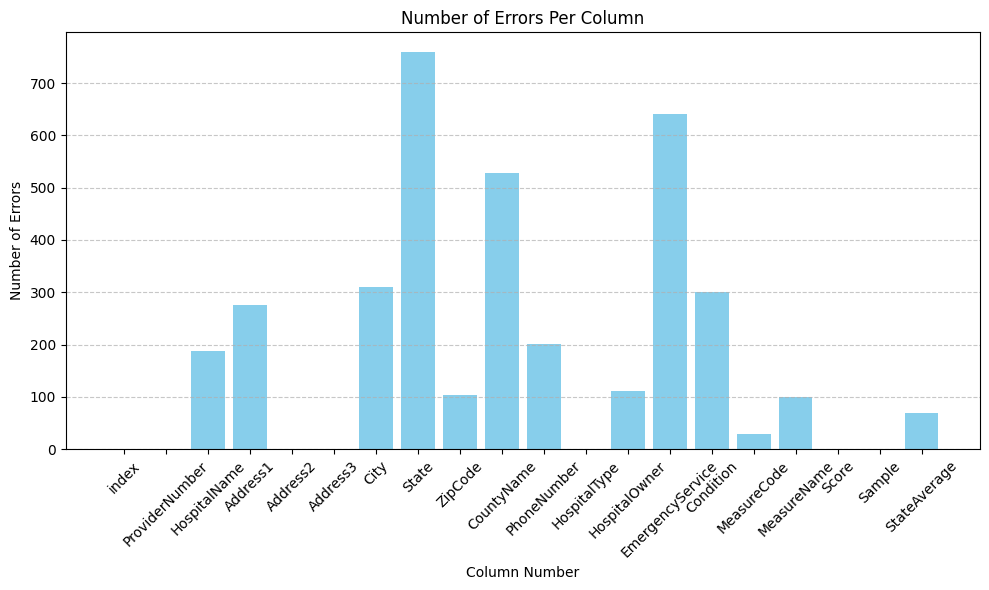

In [71]:
# BART 1
create_error_bar_chart(bart_1_mask_df)

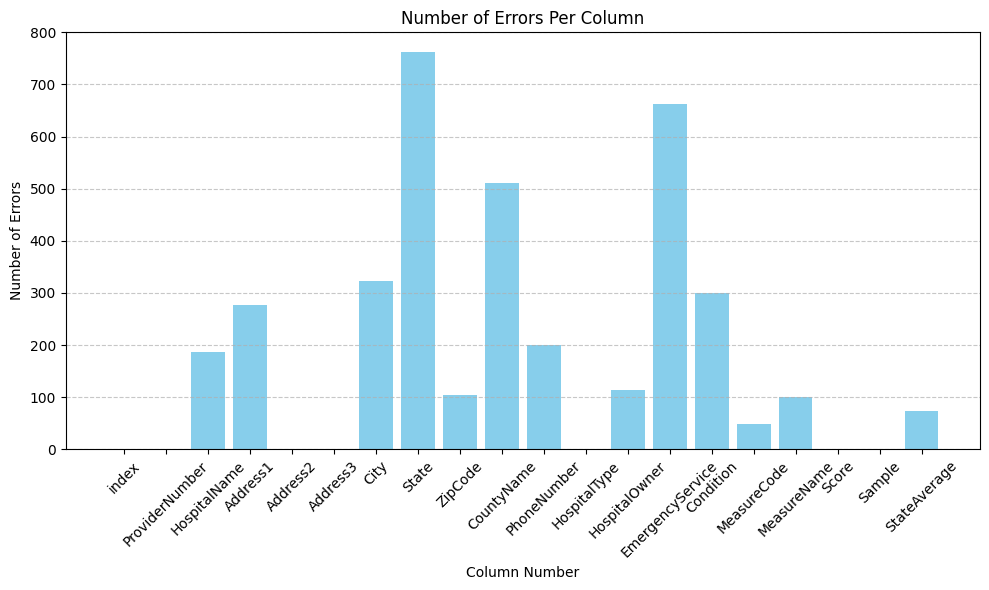

In [72]:
# BART 2
create_error_bar_chart(bart_2_mask_df)

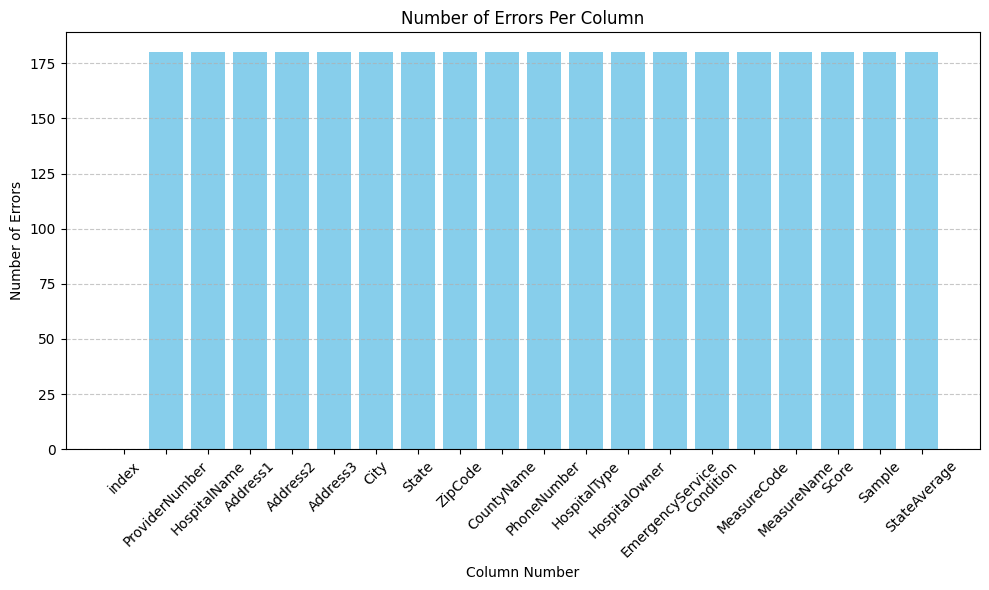

In [73]:
# ECAR
create_error_bar_chart(ecar_mask_df)

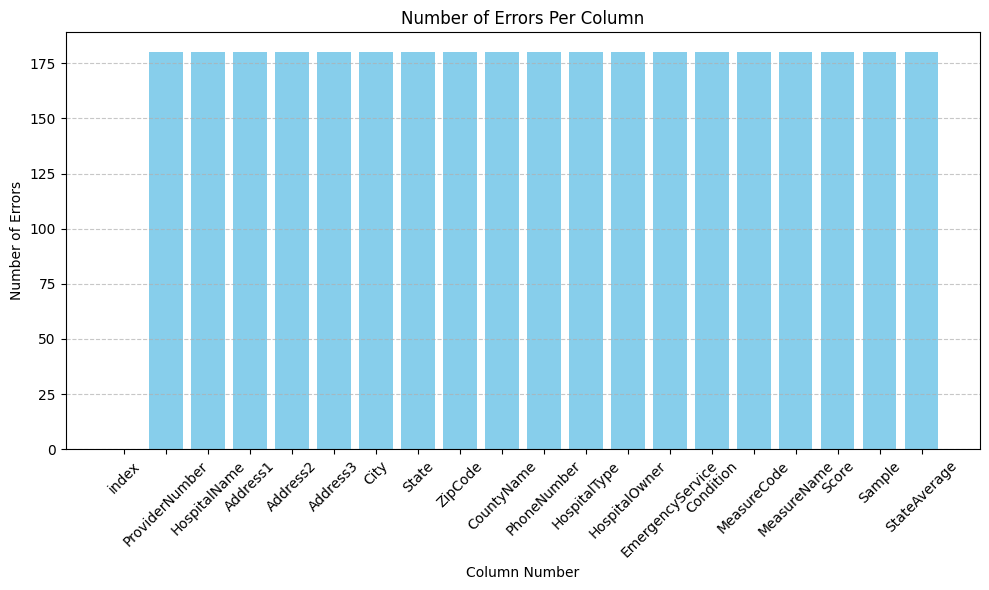

In [74]:
# ENAR
create_error_bar_chart(enar_mask_df)

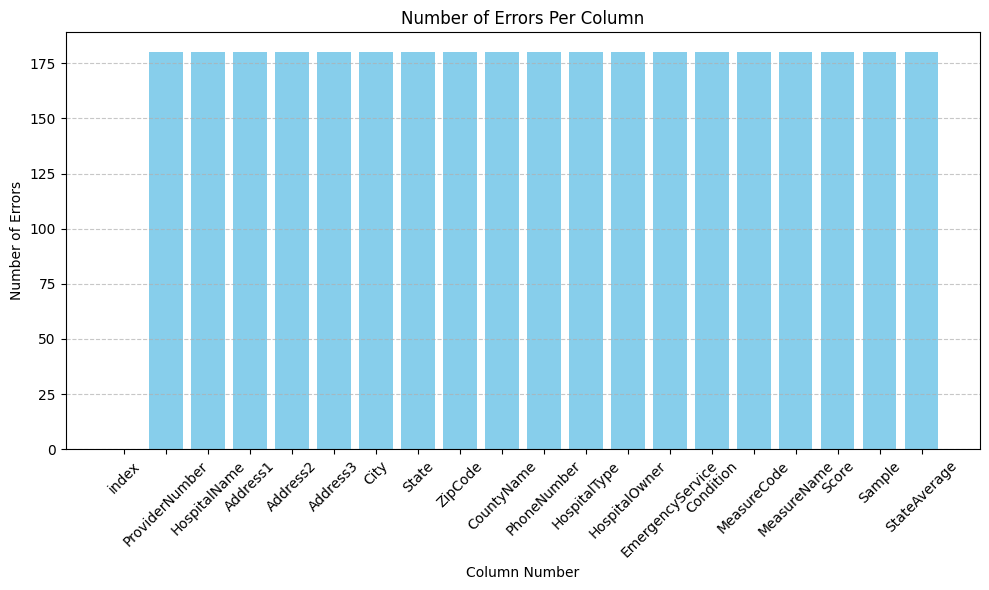

In [75]:
# EAR
create_error_bar_chart(ear_mask_df)

BART grouped bar charts

Saved chart to ./09-15-2025-BART-Comparison.pdf


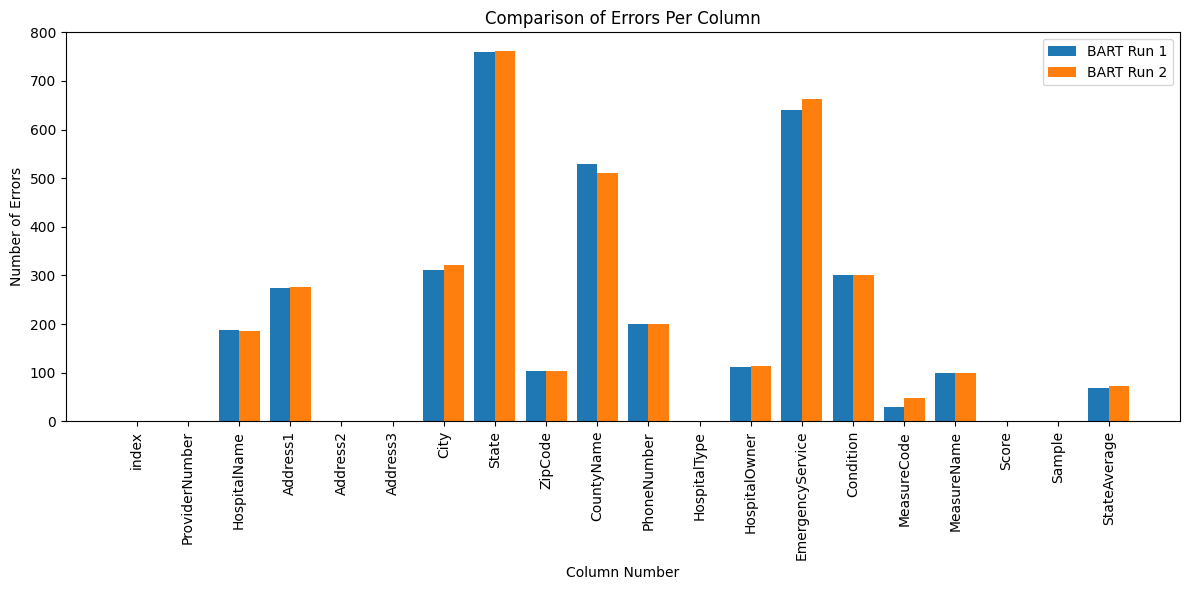

In [76]:
create_grouped_error_bar_chart([bart_1_mask_df, bart_2_mask_df], labels=["BART Run 1", "BART Run 2"], output_file="./09-15-2025-BART-Comparison.pdf")

Tab-err bar charts

Saved chart to 09-17-2025-BART-tab-err-comparison


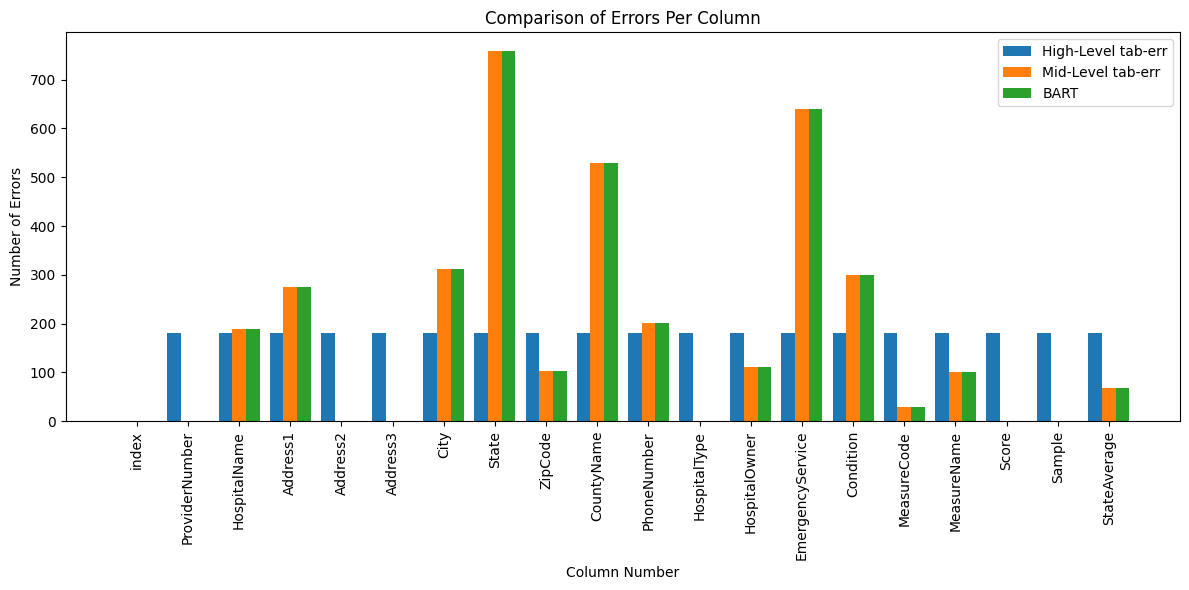

In [ ]:
create_grouped_error_bar_chart([ecar_mask_df, mid_level_mask, bart_1_mask_df], ["High-Level tab-err", "Mid-Level tab-err", "BART"], "09-17-2025-BART-tab-err-comparison.pdf")